# 서론
데이터 분석 주제 : 포켓몬스터 도감

선정 이유 : 포켓몬스터는 애니메이션을 많이들 생각하지만, 실제로 포켓몬스터 원작 게임에서 게임 플레이어들이 하는 실전 배틀에서 사용하는 6가지 포켓몬의 종족값 수치와 다른 특징들이 도감에 잘 드러나 있기 때문에 선정하였다.

데이터 분석 프로그래밍 수업에 걸맞게 통계학적 방법도 사용해 볼 예정이다.

실습이랑 시험에서 배웠던 것처럼 데이터 셋 파일을 왼쪽 파일 탭을
선택해서 업로드하자,

In [37]:
#필수로 사용할 것들을 import 해주기
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq install fonts-nanum

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [9]:
file_data = "Pokemon.csv" #csv 파일 불러오기
df_data = pd.read_csv(file_data) #판다스 이용, 데이터 읽어오기
#기존에 #은 도감 번호인데, 행으로 만들어서 헷갈리는 인덱스를 없게 한다.
display(df_data.head())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#데이터 파악
이제 데이터를 읽어왔으니, 해당 데이터 셋엔 어떤 데이터를 있는지 파악해보자

- #: 도감 번호

- Name : 포켓몬의 이름이다. 해당 데이터셋은 kaggle에서 가져온
데이터 셋이라, 영어로 되어 있다.
Mega라고 쓰여잇는 데이터는 메가진화라는 키워드이다.

- Type 1 : 포켓몬의 고유한 타입이다.
타입은 18가지이다.

- Type 2 : 포켓몬은 진화를 거듭하면서, 2가지 타입을 가질 수 있다.
고유하게 하나의 타입은 포켓몬도 있다.

- Total : 종족값으로 아래 6가지 열들의 값들을 모두 합친 값이다.

- HP : 체력

- Attack : 공격

- Defence : 방어

- Sp. Atk : Sp(Special)의 약자로 특수 공격을 의미

- Sp. Def : 특수 방어

- Speed : 속도

- Generation : 각 게임별로 세대가 주어진다. 1세대부터 처음
출시했던 게임이라고 보면 된다.

- Legendary : 각 세대별로 전설의 포켓몬들이 존재하는데, 전설의 포켓몬인지 아닌지 부울 형태로 나타냈다.




# 데이터 활용
이제 판다스 데이터프레임을 이용해, 필터링이나 함수를 사용해서
통계정보를 출력해보겠다.

In [10]:
#현재 도감 번호와 행 인덱스가 헷갈린다.
#도감 번호를 행 번호로 만들어서 읽어와보자
df = pd.read_csv(file_data, index_col = ["#"])
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


여기선, 포켓몬스터중에 전설의 포켓몬이라는 포켓몬들을 출력해보겠다.
그리고 개인적으로 제일 애정하는 타입은 물 타입의 포켓몬을 출력해보겠다.

In [26]:
lengendary_df = df[df['Legendary'] == True]
#Legendary가 True인 포켓몬만 출력되도록 : 전설의 포켓몬을 출력
print(lengendary_df)
#다음인 타입이 Water : 물타입인 포켓몬만 출력
water_df = df[df['Type 1'] == "Water"]
print(water_df)

                    Name    Type 1    Type 2  Total   HP  Attack  Defense  \
#                                                                           
144             Articuno       Ice    Flying    580   90      85      100   
145               Zapdos  Electric    Flying    580   90      90       85   
146              Moltres      Fire    Flying    580   90     100       90   
150               Mewtwo   Psychic        No    680  106     110       90   
150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   
..                   ...       ...       ...    ...  ...     ...      ...   
719              Diancie      Rock     Fairy    600   50     100      150   
719  DiancieMega Diancie      Rock     Fairy    700   50     160      110   
720  HoopaHoopa Confined   Psychic     Ghost    600   80     110       60   
720   HoopaHoopa Unbound   Psychic      Dark    680   80     160       60   
721            Volcanion      Fire     Water    600   80     110      120   

# 누락 데이터 처리
포켓몬들은 단일 타입과 2가지 타입 2가지가 있다.
단일 타입이면 Type 2가 누락이 되는데
해당 데이터들을 처리해보자

단일 타입을 타입이 한 개밖에 없기 때문에 삭제하는 것도 방법이지만
단일 타입들 중 배틀에 사용하기 좋은 포켓몬도 많기 때문에
대체를 해 볼 것이다.

In [17]:
# 현재 데이터 프레임의 정보
df.info()
# 현재 누락 데이터가 있는지 확인하기
print(df.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB
      Name  Type 1  Type 2  Total     HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                             
1    False   False   False  False  False   False    False    False    False   
2    False   False   False  False  Fal

해당 누락 데이터는 문자열로 저장된 데이터이기 때문에 누락 데이터를 삭제하자


In [20]:
df['Type 2'] = df['Type 2'].fillna("Single")
# 단일 타입을 Single이라는 의미의 Single로 대체한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


# plot 그리기
이제 누락 데이터도 처리했다. 그렇기 때문에
plot을 그려볼 것이다.
Type의 분포도를 그려볼 것이다.


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


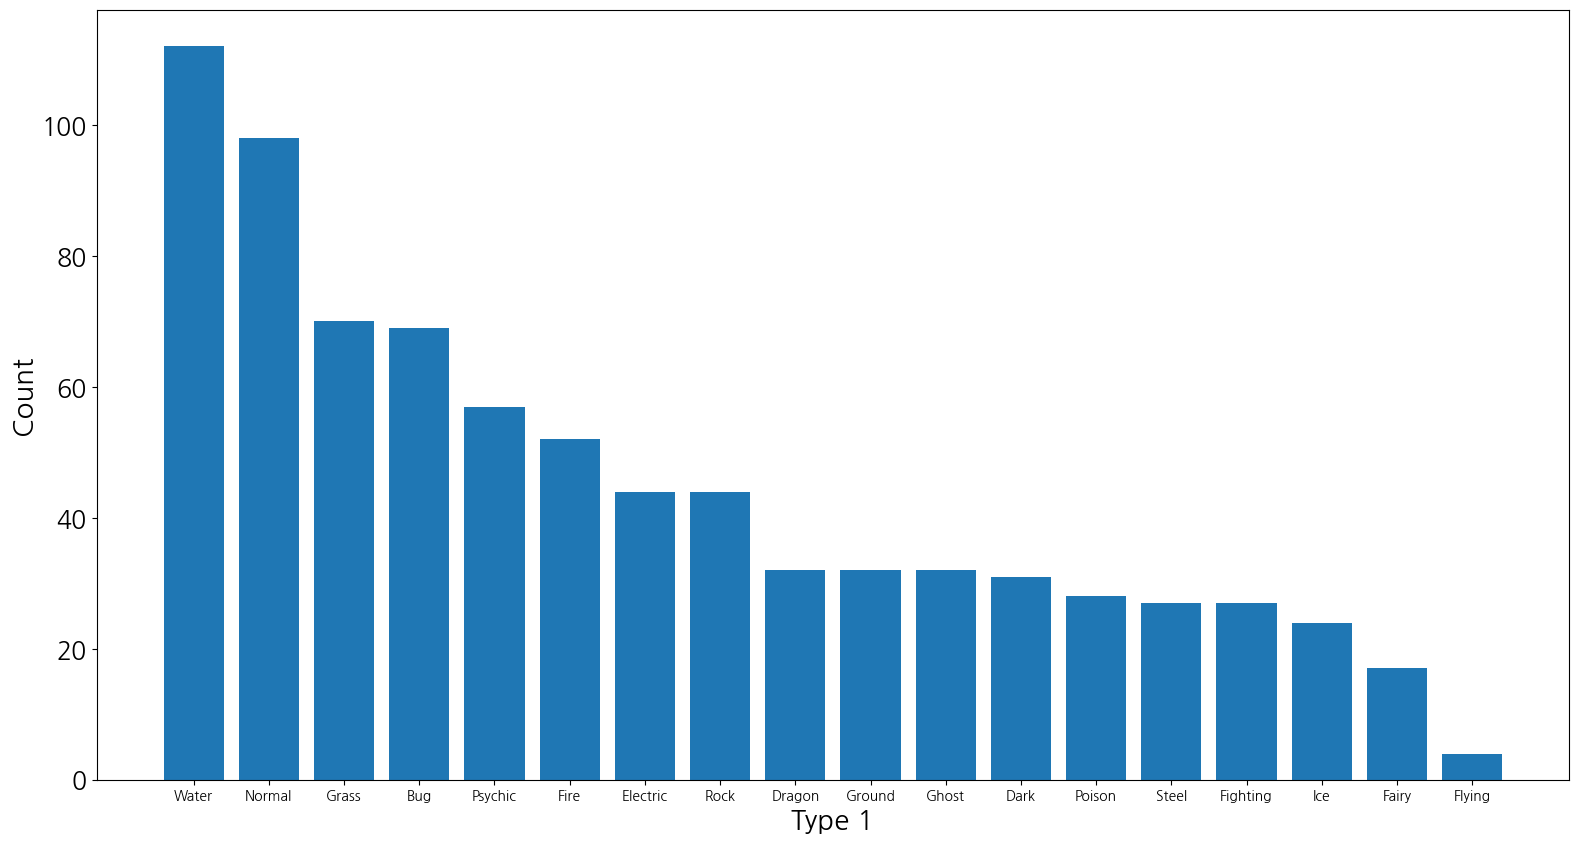

In [73]:
type1_counts = df['Type 1'].value_counts()
# Type 1의 value_counts()를 사용해 key, value 형태로 만든다.
print(type1_counts)

# 막대 그래프 그리기, 타입의 수가 많기 때문에 조정을 해준다.
plt.figure(figsize=(19, 10))
# 타입의 수에 맞게끔 size 조정
plt.bar(type1_counts.index, type1_counts.values)
# 그래프는 bar 형태로 나오게 한다.

# key를 x에, value에 count 한 값을 집어 넣는다.
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

이제 람다 함수를 적용해 Hitmap을 만들겠다.

포켓몬은 Total(종족값)에 따라 사용할 수 있는 용도가 있다.

게임을 즐기는 사람들은 종족값에 따라 스토리를 깰 때 사용하거나, 실전 배틀에서 사용하거나 그냥 도감을 채우는 용도로 포켓몬을 포획한다.

In [ ]:
# Total에 대해 500~600이면 실전, 300~400이면 스토리, 100~200이면 관상 그 이하는 귀여움
# 이라는 판단이라는 새로운 열을 생성 Seaborn의 히트맵을 위해 작성한다.